In [1]:
import numpy as np
from math import exp
import matplotlib.pyplot as plt

In [2]:
def read_data(fname='./hw4_train.dat'):
    X, Y  = [], []
    with open(fname, 'r') as f:
        for line in f.readlines():
            line = line.split()
            # add coefficient for constant
            X.append(tuple([1] + [float(v) for v in line[:-1]]))
            Y.append(int(line[-1]))
    return np.array(X), np.array(Y)

In [3]:
def sigmoid(s):
    return 1.0/(1.0+exp(-s))
def cnt_err(w, X, Y):
    err = 0.0
    for i in range(len(X)):
        pred = np.sign(sigmoid(X[i].dot(w))-1/2)
        if pred != Y[i]:
            err = err + 1
    return err/float(len(X))

In [4]:
train_x, train_y = read_data('./hw4_train.dat')
test_x, test_y = read_data('./hw4_test.dat')

In [5]:
reg_par_list = np.arange(-10,3,1)
ein_list = []
eout_list = []
for i in reg_par_list:
    reg_par = 10.0 ** i
    nfeature = len(train_x[0])
    wreg = np.linalg.inv(train_x.transpose().dot(train_x) + reg_par*np.identity(nfeature)).dot(train_x.transpose()).dot(train_y)
    ein = cnt_err(wreg, train_x, train_y)
    eout = cnt_err(wreg, test_x, test_y)
    ein_list.append(ein)
    eout_list.append(eout)

In [6]:
print(ein_list)
print(eout_list)

[0.015, 0.015, 0.015, 0.03, 0.035, 0.03, 0.03, 0.03, 0.03, 0.035, 0.035, 0.05, 0.24]
[0.02, 0.02, 0.02, 0.015, 0.016, 0.016, 0.016, 0.016, 0.016, 0.016, 0.02, 0.045, 0.261]


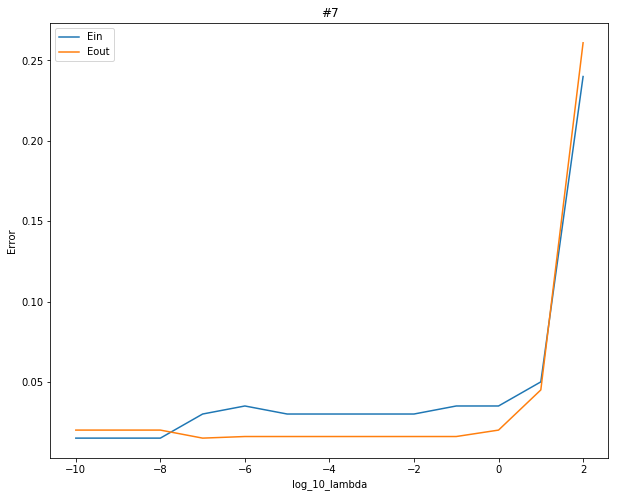

In [7]:
plt.figure(figsize=(10,8)) 
plt.plot(reg_par_list, ein_list, label='Ein')
plt.plot(reg_par_list, eout_list, label='Eout')
plt.legend(loc=2)
plt.title("#7")
plt.xlabel('log_10_lambda') 
plt.ylabel('Error')
plt.show()

In [8]:
print(ein_list)
print(eout_list)

[0.015, 0.015, 0.015, 0.03, 0.035, 0.03, 0.03, 0.03, 0.03, 0.035, 0.035, 0.05, 0.24]
[0.02, 0.02, 0.02, 0.015, 0.016, 0.016, 0.016, 0.016, 0.016, 0.016, 0.02, 0.045, 0.261]
